<a href="https://colab.research.google.com/github/LailaWulandarii/BMLP_Dataset/blob/main/Yet_another_copy_of_Template_Submission_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** [Input Nama]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Import Semua Packages/Library yang Digunakan

In [1]:
#Untuk manipulasi data dan visualisasi
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import pathlib
import random

#Untuk preprocessing gambar dan pembuatan model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input


In [2]:
#Install library tambahan yang dibutuhkan
!pip install tensorflowjs
!pip install tflite-runtime
!pip install kaggle


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.1 MB/s eta 0:00:00


In [3]:
#Import modul untuk upload file dari lokal ke Google Colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lailawulandari","key":"ed6a7f6fe8694d7a79ccafa3e546af39"}'}

## Data Preparation

### Data Loading

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0


In [6]:
!unzip rice-image-dataset.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: /content/dataset/Rice_Image_Dataset/K

In [8]:
os.listdir('/content/dataset/Rice_Image_Dataset')
!find /content/dataset -type d -name ".ipynb_checkpoints" -exec rm -r {} +
os.listdir('/content/dataset/Rice_Image_Dataset')

['Karacadag', 'Jasmine', 'Basmati', 'Ipsala', 'Arborio']

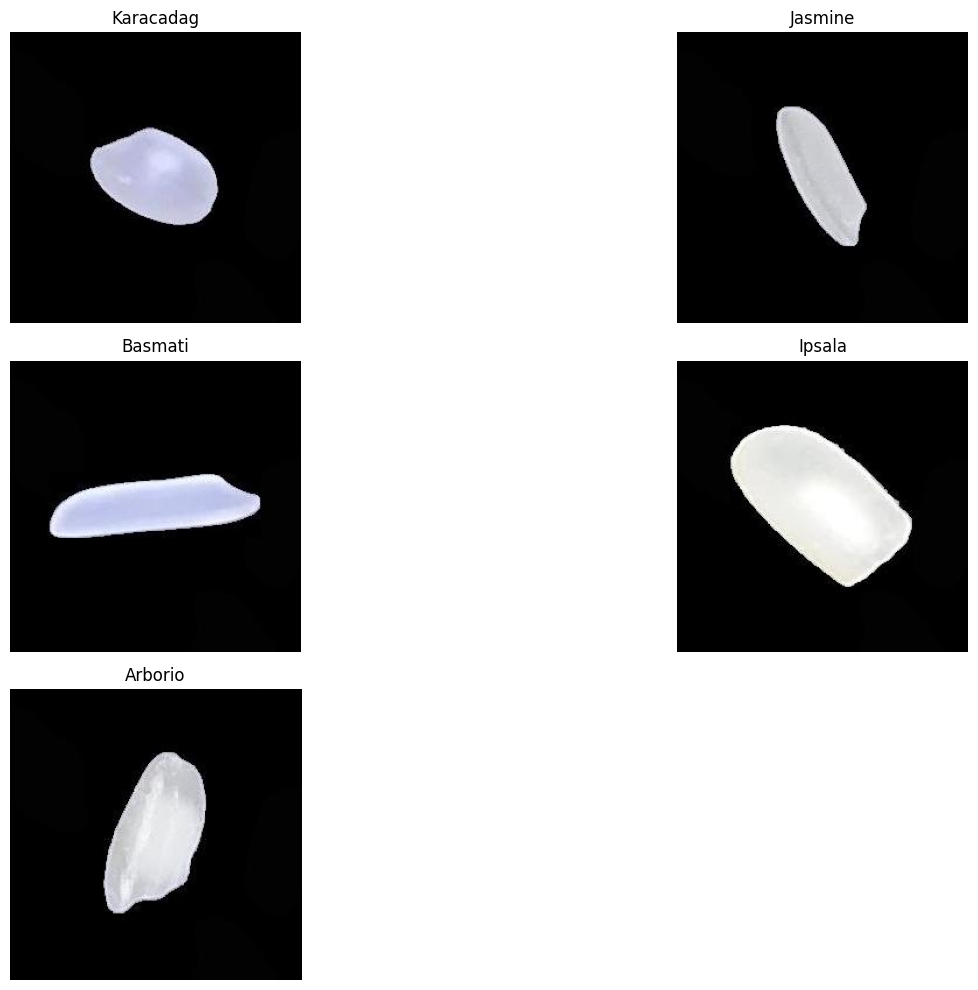

In [43]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image

# Daftar folder dataset
dataset_path = '/content/dataset/Rice_Image_Dataset'

# Ambil semua subfolder di dalam dataset (setiap subfolder adalah kategori jenis beras)
categories = os.listdir(dataset_path)

# Fungsi untuk menampilkan gambar perwakilan dari setiap kategori
def display_sample_images(dataset_path, categories):
    plt.figure(figsize=(15, 10))  # Menyesuaikan ukuran plot
    for idx, category in enumerate(categories):
        # Ambil gambar pertama dari setiap kategori
        category_path = os.path.join(dataset_path, category)
        sample_image_path = os.path.join(category_path, os.listdir(category_path)[0])  # Ambil gambar pertama
        img = mpimg.imread(sample_image_path)

        # Menampilkan gambar
        plt.subplot(3, len(categories)//3 + 1, idx + 1)  # Membuat grid untuk gambar
        plt.imshow(img)
        plt.title(category)  # Tampilkan nama kategori
        plt.axis('off')  # Matikan axis agar hanya gambar yang tampil

    plt.tight_layout()
    plt.show()

# Menampilkan gambar perwakilan dari setiap kategori
display_sample_images(dataset_path, categories)


In [44]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Direktori dataset
dataset_path = '/content/dataset/Rice_Image_Dataset'

# Ambil semua kategori (folder)
categories = os.listdir(dataset_path)

# Fungsi untuk memeriksa resolusi gambar
def check_image_resolution(dataset_path, categories):
    # Menyimpan resolusi yang ditemukan
    resolutions = set()  # Menggunakan set untuk menyaring resolusi duplikat
    for category in categories:
        category_path = os.path.join(dataset_path, category)

        # Mengambil beberapa gambar dari setiap kategori
        for img_name in os.listdir(category_path)[:5]:  # Cek hanya 5 gambar pertama
            img_path = os.path.join(category_path, img_name)
            img = image.load_img(img_path)  # Memuat gambar
            img_size = img.size  # Dapatkan resolusi gambar (lebar, tinggi)

            # Simpan resolusi gambar dalam set
            resolutions.add(img_size)

    return resolutions

# Cek resolusi gambar dalam dataset
resolutions = check_image_resolution(dataset_path, categories)

# Tampilkan hasil resolusi yang ditemukan
print("Resolusi yang ditemukan pada gambar-gambar dalam dataset:")
for res in resolutions:
    print(res)


Resolusi yang ditemukan pada gambar-gambar dalam dataset:
(250, 250)


### Data Preprocessing

#### Split Dataset

In [9]:
# Generator untuk training, validation, testing
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.8, 1.2],
    channel_shift_range=30.0,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)


In [10]:
base_dir = '/content/dataset/Rice_Image_Dataset'
output_dir = '/content/split_data'

def split_dataset(base_dir, output_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    categories = os.listdir(base_dir)

    for category in categories:
        category_path = os.path.join(base_dir, category)
        images = os.listdir(category_path)
        random.shuffle(images)

        total = len(images)
        train_count = int(train_ratio * total)
        val_count = int(val_ratio * total)

        train_imgs = images[:train_count]
        val_imgs = images[train_count:train_count+val_count]
        test_imgs = images[train_count+val_count:]

        for split_name, split_imgs in zip(['train', 'val', 'test'], [train_imgs, val_imgs, test_imgs]):
            split_dir = os.path.join(output_dir, split_name, category)
            os.makedirs(split_dir, exist_ok=True)
            for img in split_imgs:
                shutil.copy(os.path.join(category_path, img), os.path.join(split_dir, img))

split_dataset(base_dir, output_dir)


## Modelling

In [11]:
img_size = (128, 128)
batch_size = 32

train_dir = '/content/split_data/train'
val_dir = '/content/split_data/val'
test_dir = '/content/split_data/test'

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_gen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 52500 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.


In [19]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Input(shape=(128, 128, 3)),

    # Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Block 4 (Tambahan baru)
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),  # tambah neuron
    Dropout(0.5),                   # naikkin dropout sedikit buat generalisasi
    Dense(5, activation='softmax')  # pastikan jumlah kelas sesuai
])


In [20]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,586,181 (17.49 MB)

 Trainable params: 4,585,221 (17.49 MB)

 Non-trainable params: 960 (3.75 KB)

## Evaluasi dan Visualisasi

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
]


In [22]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=callbacks,
)


Epoch 1/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.5680 - loss: 1.1978

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 339s 202ms/step - accuracy: 0.5681 - loss: 1.1975 - val_accuracy: 0.9274 - val_loss: 0.2235
Epoch 2/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.8842 - loss: 0.3156

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 328s 200ms/step - accuracy: 0.8842 - loss: 0.3155 - val_accuracy: 0.9702 - val_loss: 0.0965
Epoch 3/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 327s 199ms/step - accuracy: 0.9162 - loss: 0.2361 - val_accuracy: 0.8246 - val_loss: 0.8063
Epoch 4/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9395 - loss: 0.1748

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 380s 198ms/step - accuracy: 0.9395 - loss: 0.1748 - val_accuracy: 0.9692 - val_loss: 0.0965
Epoch 5/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 329s 201ms/step - accuracy: 0.9463 - loss: 0.1468 - val_accuracy: 0.8438 - val_loss: 0.9219
Epoch 6/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 340s 207ms/step - accuracy: 0.9504 - loss: 0.1422 - val_accuracy: 0.9625 - val_loss: 0.1788
Epoch 7/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9580 - loss: 0.1196

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 330s 201ms/step - accuracy: 0.9580 - loss: 0.1196 - val_accuracy: 0.9767 - val_loss: 0.0818
Epoch 8/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 328s 200ms/step - accuracy: 0.9603 - loss: 0.1113 - val_accuracy: 0.9573 - val_loss: 0.1917
Epoch 9/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 329s 200ms/step - accuracy: 0.9630 - loss: 0.1072 - val_accuracy: 0.9477 - val_loss: 0.3533
Epoch 10/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9638 - loss: 0.1065

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 326s 198ms/step - accuracy: 0.9638 - loss: 0.1065 - val_accuracy: 0.9860 - val_loss: 0.0521
Epoch 11/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 329s 200ms/step - accuracy: 0.9627 - loss: 0.1057 - val_accuracy: 0.7703 - val_loss: 1.4197
Epoch 12/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9668 - loss: 0.0941

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 325s 198ms/step - accuracy: 0.9668 - loss: 0.0941 - val_accuracy: 0.9945 - val_loss: 0.0162
Epoch 13/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 325s 198ms/step - accuracy: 0.9683 - loss: 0.0935 - val_accuracy: 0.8525 - val_loss: 1.2339
Epoch 14/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 381s 197ms/step - accuracy: 0.9705 - loss: 0.0849 - val_accuracy: 0.9599 - val_loss: 0.2783
Epoch 15/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 327s 199ms/step - accuracy: 0.9725 - loss: 0.0796 - val_accuracy: 0.9621 - val_loss: 0.2288


In [23]:
train_acc = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
val_acc = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Akurasi Training Akhir: {train_acc:.4f}")
print(f"Loss Training Akhir: {train_loss:.4f}")
print(f"Akurasi Validasi Akhir: {val_acc:.4f}")
print(f"Loss Validasi Akhir: {val_loss:.4f}")


Akurasi Training Akhir: 0.9716
Loss Training Akhir: 0.0823
Akurasi Validasi Akhir: 0.9621
Loss Validasi Akhir: 0.2288


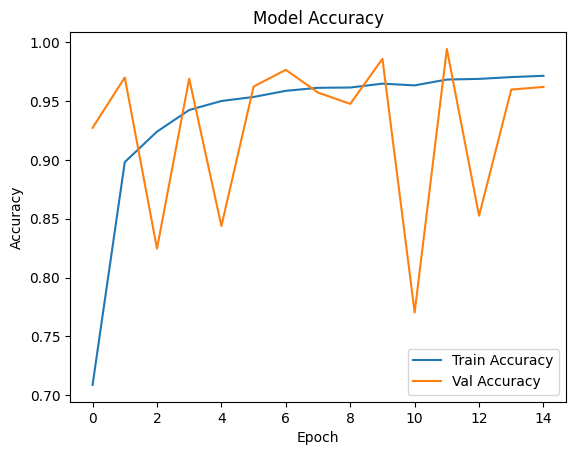

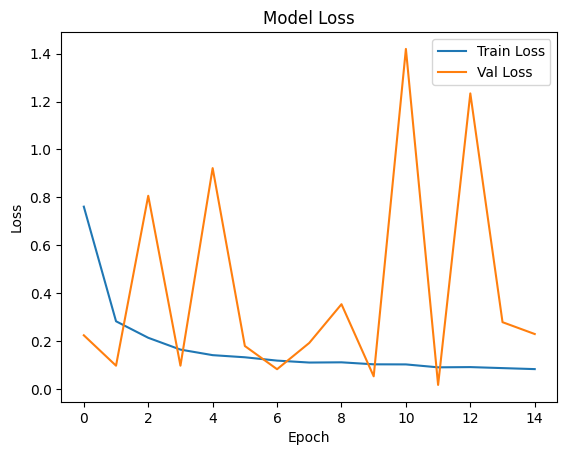

In [24]:
import matplotlib.pyplot as plt

# Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Akurasi Test: {test_acc:.4f}')
print(f'Loss Test: {test_loss:.4f}')


352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9947 - loss: 0.0161
Akurasi Test: 0.9949
Loss Test: 0.0141


352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step


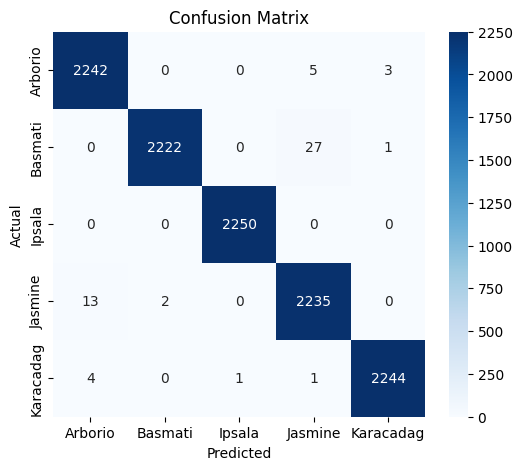

Classification Report:
              precision    recall  f1-score   support

     Arborio       0.99      1.00      0.99      2250
     Basmati       1.00      0.99      0.99      2250
      Ipsala       1.00      1.00      1.00      2250
     Jasmine       0.99      0.99      0.99      2250
   Karacadag       1.00      1.00      1.00      2250

    accuracy                           0.99     11250
   macro avg       0.99      0.99      0.99     11250
weighted avg       0.99      0.99      0.99     11250



In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Prediksi kelas
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Label nama kelas
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


## Konversi Model

In [33]:
from tensorflow.keras.models import load_model

# Load model hasil training dari file .h5
model = load_model("best_model.h5")


In [34]:
import tensorflow as tf

# Simpan model ke dalam format SavedModel
tf.saved_model.save(model, "submission/saved_model/")


In [37]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_saved_model("submission/saved_model/")
tflite_model = converter.convert()

# Simpan hasil konversi ke dalam folder tflite
with open("submission/tflite/model.tflite", "wb") as f:
    f.write(tflite_model)


## Inference (Optional)

Saving inference 2.jpg to inference 2.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


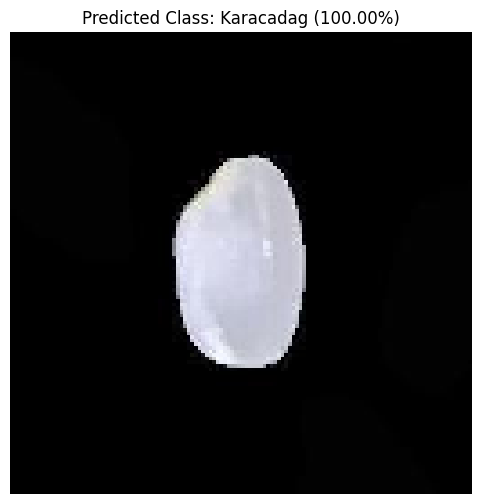

In [42]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load model yang sudah dilatih
model = load_model("best_model.keras")  # Pastikan ini model beras yang sudah dilatih

# Upload gambar beras
uploaded = files.upload()

# Proses gambar yang di-upload
for fn in uploaded.keys():
    # Load gambar dengan target size sesuai input model (misalnya 128x128)
    test_img = image.load_img(fn, target_size=(128, 128))  # RGB default

    # Preprocessing gambar
    pp_test_img = image.img_to_array(test_img)
    pp_test_img = pp_test_img / 255.0  # Normalisasi gambar (rentang 0-1)
    pp_test_img = np.expand_dims(pp_test_img, axis=0)  # Tambah dimensi untuk batch size

    # Prediksi menggunakan model
    test_preds = model.predict(pp_test_img)

    # Tampilkan hasil prediksi
    plt.figure(figsize=(6,6))
    plt.axis('off')

    # Menampilkan hasil prediksi berdasarkan probabilitas
    predicted_class = np.argmax(test_preds, axis=1)  # Mengambil kelas dengan probabilitas tertinggi
    class_labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']  # Ganti dengan label kelas beras yang benar
    predicted_label = class_labels[predicted_class[0]]

    # Tampilkan hasil
    plt.title(f"Predicted Class: {predicted_label} ({test_preds[0][predicted_class[0]]*100:.2f}%)")
    plt.imshow(np.squeeze(pp_test_img))
    plt.show()
